Second take in STFT

In [75]:
#libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import stft, istft

sn.set_style('darkgrid')
np.random.seed(27)

## 
Señal de prueba

In [71]:
freq1 = 10
freq2 = 20
freq3 = 30

sig10hz = np.sin(2*np.pi*freq1*np.arange(0,10,0.001))
sig20hz = np.sin(2*np.pi*freq2*np.arange(0,10,0.001))
sig30hz  = np.sin(2*np.pi*freq3*np.arange(0,10,0.001))

time =  np.linspace(0,10,10000)

sig = sig10hz + sig20hz + sig30hz


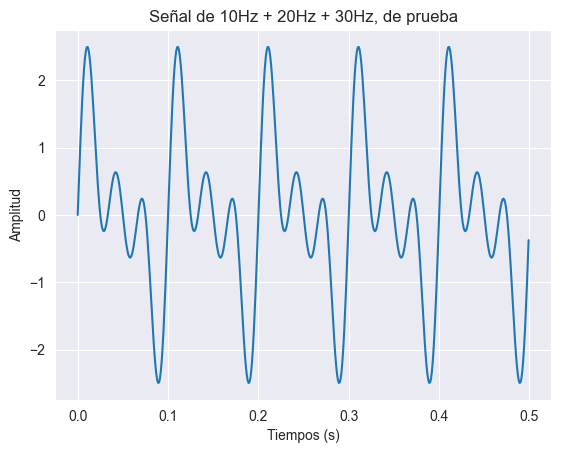

In [73]:
plt.plot(time[:500],sig[:500])
plt.xlabel('Tiempos (s)')
plt.ylabel('Amplitud')
plt.title('Señal de 10Hz + 20Hz + 30Hz, de prueba')
plt.show()

#ceros: en 0.6325, 1.3825, cada vez que sin(5hz) se va a cero


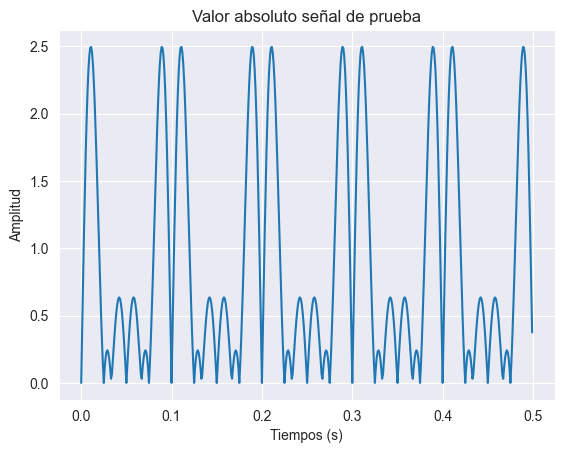

In [74]:
#abs de la señal.

plt.plot(time[:500],abs(sig[:500]))
plt.xlabel('Tiempos (s)')
plt.ylabel('Amplitud')
plt.title('Valor absoluto señal de prueba')
plt.show()

In [19]:
#ceros de la señal de prueba
x = []
for i in range(len(sig)-1):
    if((sig[i] < 0 and sig[i+1] > 0) or (sig[i] > 0 and sig[i+1] < 0)):
        x.append(i)


####
Ruido:

Generar ruido con un f^0, y modularlo como la amplitud de la señal de prueba. 
Este ruido, pasarlon por filtro pasa alto, cosa de tener solo una onda molesta muy baja, y que no se note mucho, pero si genere distorción de la señal inicial y cree singularidades en el espectro.

In [89]:
noise = np.random.normal(0,1,sig.size)

In [87]:
rms = math.sqrt(np.mean(sig**2))
rms_noise =  math.sqrt(np.mean(noise**2))
snr = 10*np.log(rms**2/rms_noise**2)

In [90]:
print('RMS:\t',rms)
print('RMS Noise:\t',rms_noise)
print('SNR:\t',snr)

RMS:	 1.224744871391589
RMS Noise:	 0.9926365304622479
SNR:	 4.202465355141905


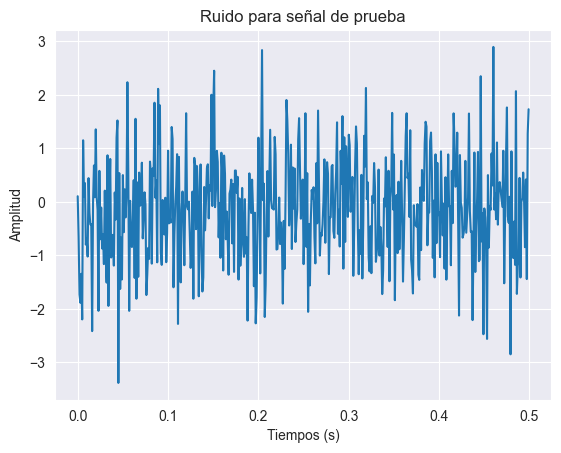

In [91]:
#plot del ruido

plt.plot(time[:500],noise[:500])
plt.xlabel('Tiempos (s)')
plt.ylabel('Amplitud')
plt.title('Ruido para señal de prueba')
plt.show()

Ahora, tengo que filtrar el ruido, para que solo me queden las frecuencias menores a 5Hz y estas agregarlas a la otra señal y luego obtener el espectro o el movimiento absoluto de la señal.

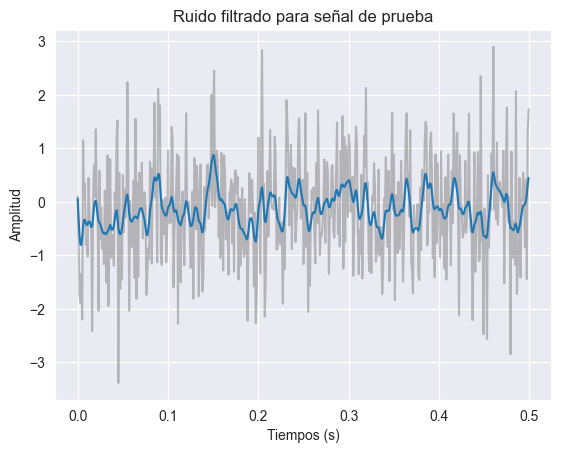

In [171]:
# filtro pasa bajos
from scipy import signal

#corto en una frecuencia cercana a los 5Hz, o 1/8 rad.
#filtro de orden 1

b, a = signal.butter(1, 1/8, 'lowpass')
filtered = signal.filtfilt(b, a, noise)


plt.plot(time[:500],noise[:500],alpha=0.5, color ='grey')
plt.plot(time[:500],filtered[:500])
plt.xlabel('Tiempos (s)')
plt.ylabel('Amplitud')
plt.title('Ruido filtrado para señal de prueba')
plt.show()

In [158]:
1/((1/5)*(1/2*np.pi))

3.183098861837907

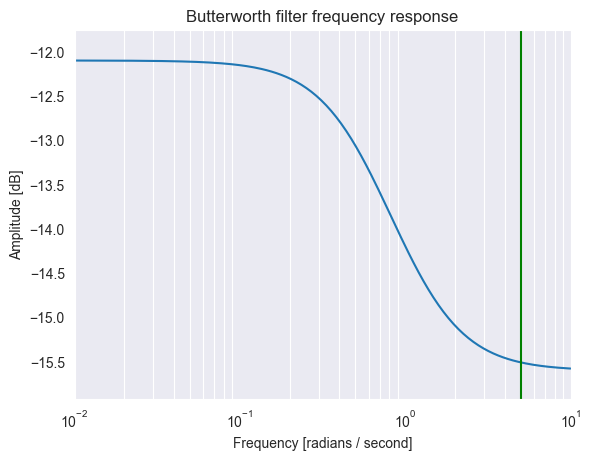

In [172]:
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(5, color='green') # cutoff frequency
plt.show()

###
Señal de prueba: señal de testeo formada por 10,20 y 30 Hz
Ruido: ruido gaussiano entre 0 y 1 con std de 0.1 y mean de 0.5
Filtro: pasabajos de 5Hz, digital de orden 2

Señal de testeo final: **Señal de prueba * Ruido filtrado**

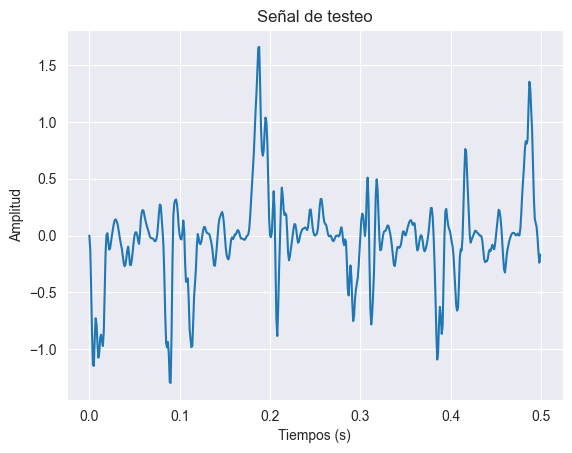

In [174]:
tester = filtered*sig

plt.plot(time[:500],tester[:500])
plt.xlabel('Tiempos (s)')
plt.ylabel('Amplitud')
plt.title('Señal de testeo')
plt.show()

###
La señal de testeo tiene entonces, una amplitud que depende del tiempo y corresponde, en este caso, a un ruido gaussiano controlado y filtrado.
